In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
# Replace the file path with your actual file location
dataset = pd.read_csv(r"/content/AI-Driven 5G Network QoS and Resource Prediction.csv")

# Display the l

In [3]:
# Print the number of unique columns in the dataset
print(f"column no : {len(dataset.columns.unique())}")

# Print the total number of rows in the dataset
print(f"row no : {len(dataset.index)}")

column no : 8
row no : 400


In [4]:
# Check the number of missing (null) values in each column of the dataset
dataset.isnull().sum()

# Check if there is any missing (null) value in each column (returns True/False)
dataset.isnull().any()

,0
Timestamp,False
User_ID,False
Application_Type,False
Signal_Strength,False
Latency,False
Required_Bandwidth,False
Allocated_Bandwidth,False
Resource_Allocation,False


In [5]:
# Get a concise summary of the dataset including data types, non-null counts, and memory usage
dataset.info()

# Generate descriptive statistics for numerical columns: count, mean, std, min, quartiles, max
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_400,Video_Call,-85 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [6]:
# Print the number of unique values in each column of the dataset
print(dataset.nunique())

Timestamp                7
User_ID                400
Application_Type        11
Signal_Strength         84
Latency                 87
Required_Bandwidth     188
Allocated_Bandwidth    194
Resource_Allocation      9
dtype: int64


In [7]:
def Mbps_to_Kbps(value):
    """
    Convert a bandwidth value from Mbps to Kbps if it contains 'Mbps'.
    Otherwise, return the original value unchanged.

    Parameters:
    value (str): Bandwidth string, e.g., '10 Mbps' or '500 Kbps'

    Returns:
    str: Converted bandwidth string in Kbps, e.g., '10000 Kbps'
    """
    if 'Mbps' in value:
        # Extract numeric part, convert to float, multiply by 1000 to convert Mbps to Kbps
        n = float(value.replace(' Mbps', ''))
        return str(n * 1000) + ' Kbps'
    else:
        # Return original value if it does not contain 'Mbps'
        return value

In [8]:
# Convert 'Required_Bandwidth' and 'Allocated_Bandwidth' values from Mbps to Kbps using a mapping dictionary
dataset['Required_Bandwidth'] = dataset['Required_Bandwidth'].map(Mbps_to_Kbps)
dataset['Allocated_Bandwidth'] = dataset['Allocated_Bandwidth'].map(Mbps_to_Kbps)

# Remove the string 'Kbps' from the bandwidth columns and convert the resulting values to float type
# This cleans the data to enable numerical analysis and modeling
dataset['Required_Bandwidth'] = dataset['Required_Bandwidth'].str.replace('Kbps', '').astype('float')
dataset['Allocated_Bandwidth'] = dataset['Allocated_Bandwidth'].str.replace('Kbps', '').astype('float')

In [9]:
# Remove the 'ms' unit from 'Latency' column and convert the values to integers
dataset['Latency'] = dataset['Latency'].str.replace('ms', '').astype('int')

# Remove the 'dBm' unit from 'Signal_Strength' column and convert the values to integers
dataset['Signal_Strength'] = dataset['Signal_Strength'].str.replace('dBm', '').astype('int')

In [10]:
# Convert the 'Timestamp' column to datetime format
# This enables datetime operations like sorting, filtering, and time-based analysis
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])


In [11]:
# Remove the '%' symbol from 'Resource_Allocation' column and convert the values to integers
# This cleans the data to allow numerical computations on resource allocation percentages
dataset['Resource_Allocation'] = dataset['Resource_Allocation'].str.replace('%', '').astype('int')

In [12]:
# Drop the 'User_ID' column from the dataset as it may be irrelevant for analysis or model training
dataset = dataset.drop(columns=['User_ID'])

In [13]:
print(dataset)

              Timestamp   Application_Type  Signal_Strength  Latency  \
0   2023-09-03 10:00:00         Video_Call              -75       30   
1   2023-09-03 10:00:00         Voice_Call              -80       20   
2   2023-09-03 10:00:00          Streaming              -85       40   
3   2023-09-03 10:00:00  Emergency_Service              -70       10   
4   2023-09-03 10:00:00      Online_Gaming              -78       25   
..                  ...                ...              ...      ...   
395 2023-09-03 10:06:00          Streaming             -110       61   
396 2023-09-03 10:06:00         Video_Call              -40       53   
397 2023-09-03 10:06:00    Video_Streaming             -113       58   
398 2023-09-03 10:06:00  Emergency_Service              -40        5   
399 2023-09-03 10:06:00       Web_Browsing             -113        0   

     Required_Bandwidth  Allocated_Bandwidth  Resource_Allocation  
0               10000.0              15000.0                   70  

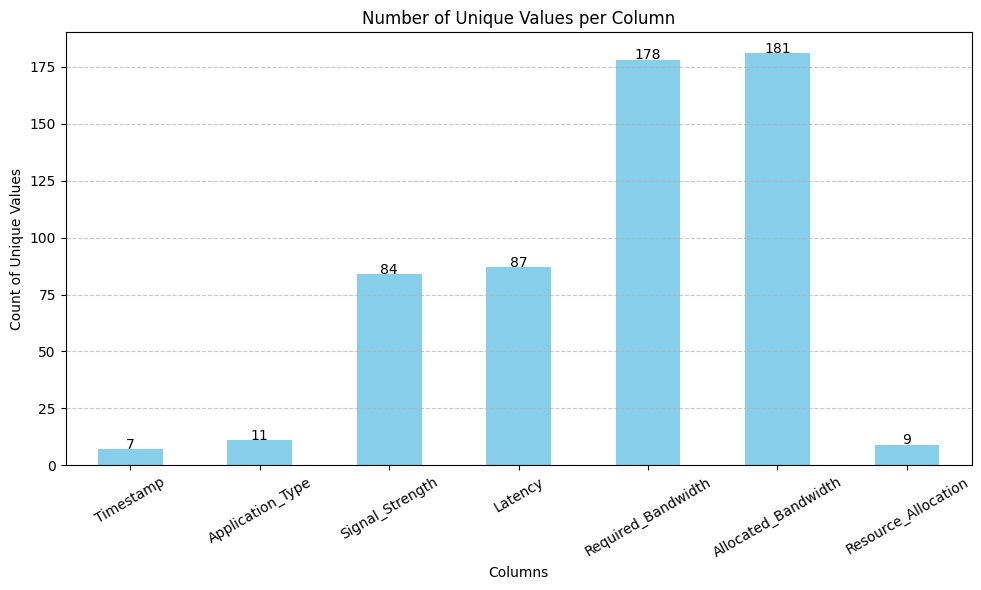

In [14]:
# Get unique counts
unique_counts = dataset.nunique()

# Create bar plot
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')

# Customize plot
plt.title('Number of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(unique_counts):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.tight_layout()
plt.show()

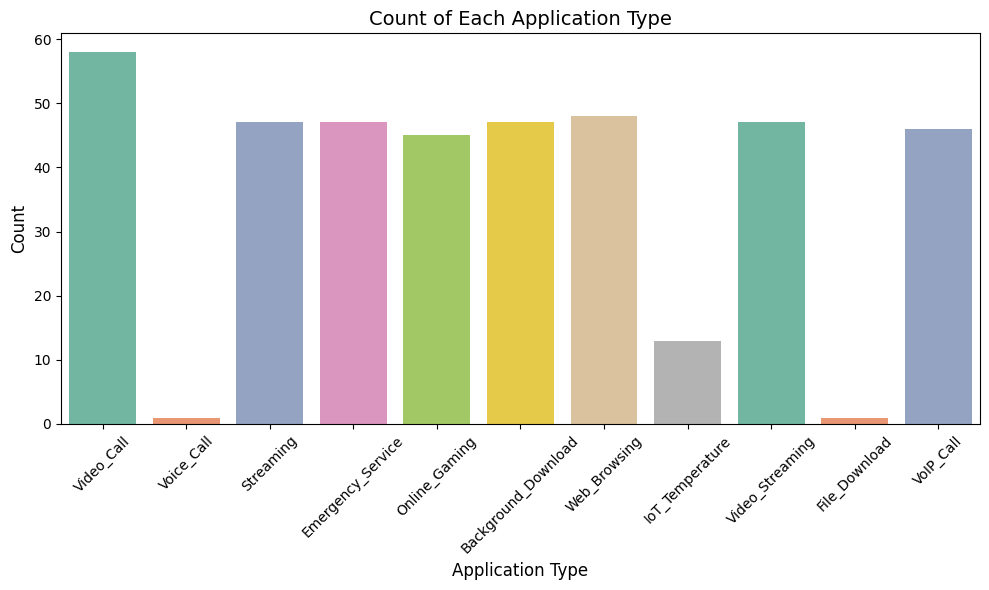

In [15]:
# Set figure size to 10x6 inches for clear visualization
plt.figure(figsize=(10, 6))

# Create a count plot showing the frequency of each category in 'Application_Type'
# The palette parameter defines the color theme of the bars
sns.countplot(data=dataset, x='Application_Type', palette='Set2')

# Rotate x-axis labels by 45 degrees to improve readability if labels are long
plt.xticks(rotation=45)

# Add a descriptive title and axis labels with appropriate font sizes
plt.title("Count of Each Application Type", fontsize=14)
plt.xlabel("Application Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Automatically adjust subplot params to fit elements nicely
plt.tight_layout()

# Show the plot on screen
plt.show()

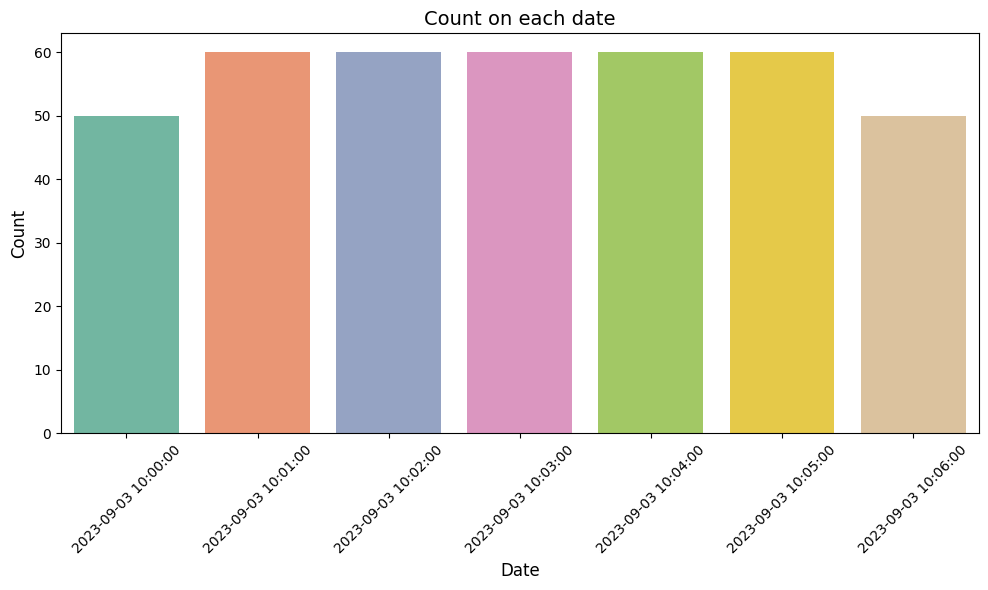

In [16]:
# Set the figure size to 10 inches wide by 6 inches high for clarity
plt.figure(figsize=(10, 6))

# Create a count plot to visualize the frequency of each 'Timestamp' (date) in the dataset
# The 'palette' parameter controls the color scheme (options like 'Set2', 'Set3', 'pastel', 'muted', etc.)
sns.countplot(data=dataset, x='Timestamp', palette='Set2')

# Rotate x-axis labels by 45 degrees to avoid overlap and improve readability
plt.xticks(rotation=45)

# Add a title and axis labels with readable font sizes
plt.title("Count on each date", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjust layout to prevent clipping of labels and titles
plt.tight_layout()

# Display the plot
plt.show()

In [17]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np  # Ensure numpy is imported for array manipulation

# Initialize the OrdinalEncoder to convert categorical string labels into integer codes
encoder = OrdinalEncoder()

# Reshape the 'Application_Type' column into a 2D array as required by the encoder
# Then fit the encoder and transform the categorical values into ordinal integers
dataset['Application_Type'] = encoder.fit_transform(np.array(dataset['Application_Type']).reshape(-1, 1))

BEFORE REMOVING OUTLIERS

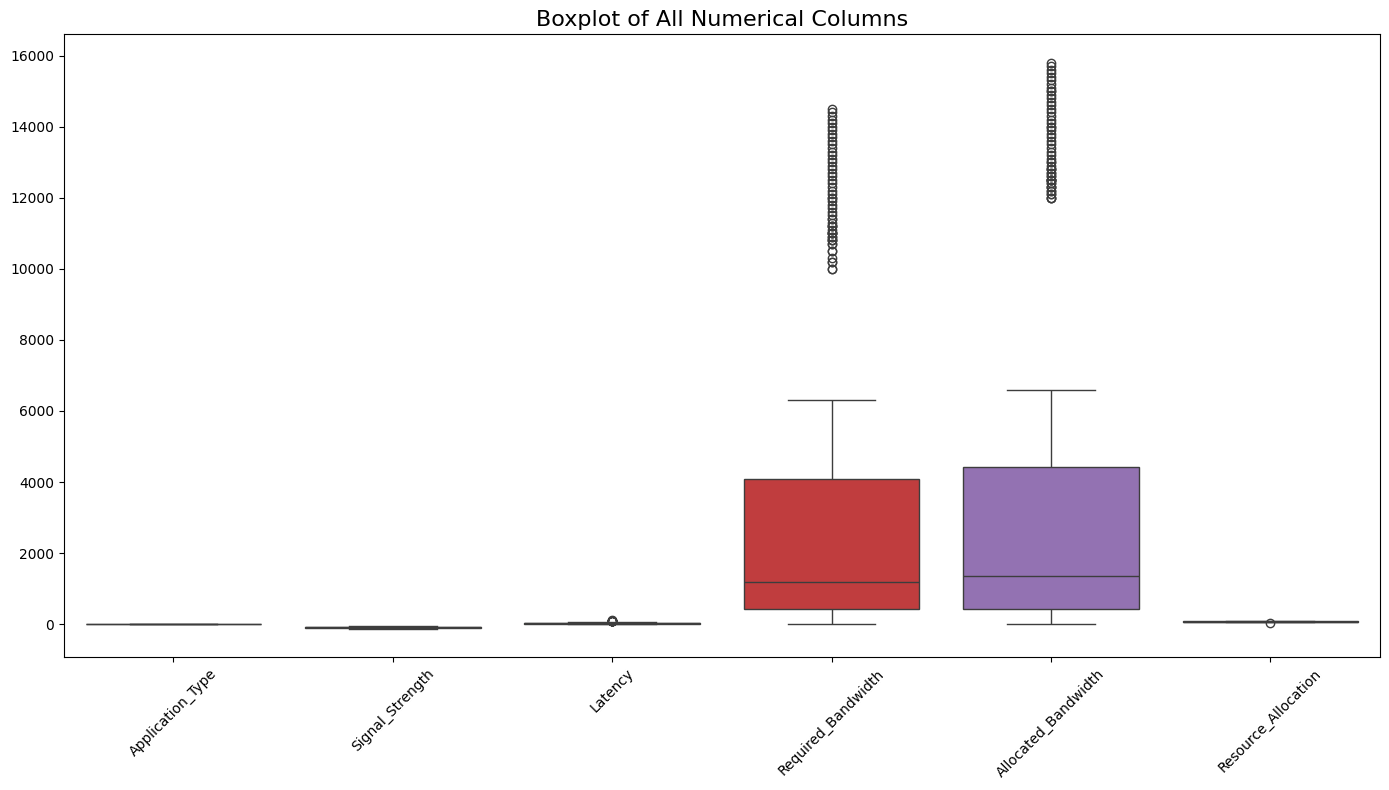

In [18]:

# Create a figure with size 14x8 inches for better visibility
plt.figure(figsize=(14, 8))

# Plot boxplots for all numerical columns in the dataset using seaborn
# Boxplots help visualize distribution, central tendency, and outliers
sns.boxplot(data=dataset)

# Add a title with a larger font size for clarity
plt.title("Boxplot of All Numerical Columns", fontsize=16)

# Rotate x-axis labels by 45 degrees to avoid overlap if labels are long
plt.xticks(rotation=45)

# Adjust subplot params so that the plot fits nicely within the figure area
plt.tight_layout()

# Display the plot
plt.show()

In [19]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of columns to clean
columns_to_clean = ['Latency', 'Required_Bandwidth', 'Allocated_Bandwidth']

# Apply the cleaning
dataset = remove_outliers_iqr(dataset, columns_to_clean)

AFTER REMOVING OUTLIERS

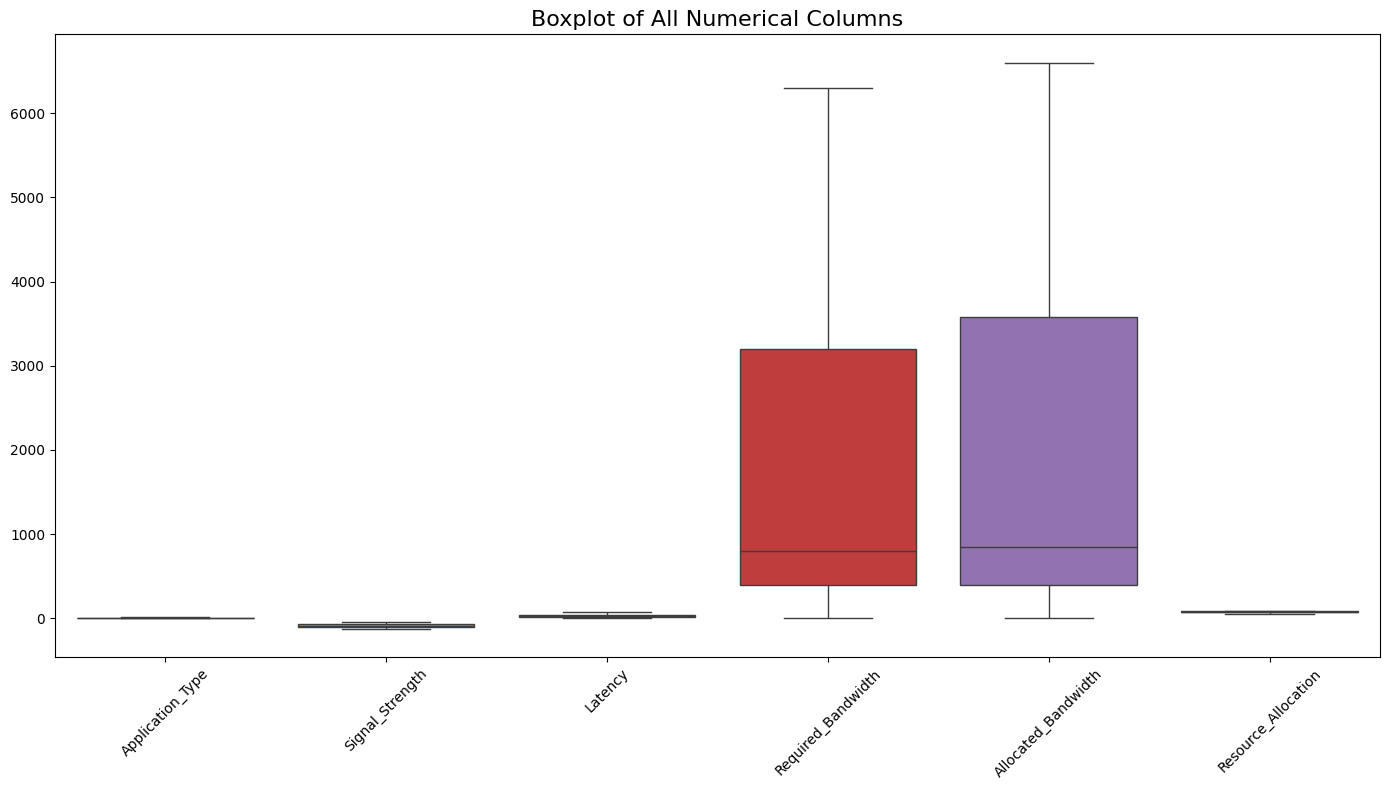

In [20]:
# Set the size of the figure to 14 inches wide by 8 inches high for better readability
plt.figure(figsize=(14, 8))

# Create a boxplot for each numerical column in the dataset to visualize data distribution and detect outliers
sns.boxplot(data=dataset)

# Add a descriptive title with font size 16
plt.title("Boxplot of All Numerical Columns", fontsize=16)

# Rotate x-axis labels by 45 degrees to prevent overlapping if labels are long
plt.xticks(rotation=45)

# Automatically adjust subplot parameters to give padding and avoid clipping of labels/titles
plt.tight_layout()

# Render the plot to the screen
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to normalize/scale between 0 and 1
columns_to_scale = ['Latency', 'Signal_Strength', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on selected columns and transform them
# This scales values to a range [0, 1], which can improve model performance
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Display the scaled dataset
print(dataset)

              Timestamp  Application_Type  Signal_Strength   Latency  \
1   2023-09-03 10:00:00               9.0         0.518072  0.256410   
2   2023-09-03 10:00:00               5.0         0.457831  0.512821   
3   2023-09-03 10:00:00               1.0         0.638554  0.128205   
4   2023-09-03 10:00:00               4.0         0.542169  0.320513   
5   2023-09-03 10:00:00               0.0         0.397590  0.641026   
..                  ...               ...              ...       ...   
394 2023-09-03 10:06:00               4.0         0.987952  0.602564   
395 2023-09-03 10:06:00               5.0         0.156627  0.782051   
397 2023-09-03 10:06:00               7.0         0.120482  0.743590   
398 2023-09-03 10:06:00               1.0         1.000000  0.064103   
399 2023-09-03 10:06:00              10.0         0.120482  0.000000   

     Required_Bandwidth  Allocated_Bandwidth  Resource_Allocation  
1              0.015873             0.018182             0.714286  

In [22]:
# Remove the 'Timestamp' column from the dataset as it may be irrelevant or not needed for analysis
dataset.drop(columns=['Timestamp'], inplace=True)

**DIVIDING THE PRE-PROCESSED DATA INTO TRAINING AND TEST SET**

In [23]:
# Separate features and target variable from the dataset
X = dataset.iloc[:, :-1].values  # Select all columns except the last as features (input variables)
y = dataset.iloc[:, -1].values   # Select the last column as the target variable (output)

# Print the feature matrix X
print(f"X is {X}")
print("--------------------------------------------------------------------------------------------------------")

# Print the target vector y
print(f"y is {y}")

X is [[ 9.          0.51807229  0.25641026  0.01587302  0.01818182]
 [ 5.          0.45783133  0.51282051  0.79365079  0.90909091]
 [ 1.          0.63855422  0.12820513  0.15873016  0.22727273]
 ...
 [ 7.          0.12048193  0.74358974  0.15873016  0.21212121]
 [ 1.          1.          0.06410256  0.06349206  0.06060606]
 [10.          0.12048193  0.          0.01587302  0.01515152]]
--------------------------------------------------------------------------------------------------------
y is [0.71428571 0.57142857 1.         0.85714286 0.42857143 0.14285714
 0.71428571 0.42857143 0.57142857 0.28571429 0.85714286 0.42857143
 0.71428571 0.         0.57142857 0.71428571 0.42857143 1.
 0.85714286 0.42857143 0.14285714 0.42857143 0.71428571 0.42857143
 1.         0.85714286 0.42857143 0.14285714 0.42857143 0.57142857
 0.42857143 1.         0.85714286 0.42857143 0.14285714 0.42857143
 0.85714286 0.42857143 1.         0.85714286 0.42857143 0.14285714
 0.42857143 0.71428571 0.42857143 1.    

In [24]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
# 80% training data and 20% testing data, with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting arrays
# This helps confirm the split sizes and dimensionality
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((264, 5), (66, 5), (264,), (66,))

**APPLYING 7 DIFFERENT REGRESSOR MODELS**

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize variables to track best scores and results
temp_crossval_score = -float('inf')  # Best mean cross-validation R² score seen so far
temp_test_score = -float('inf')      # Best test set R² score seen so far

cross_val_scores = []  # To store mean cross-validation R² scores of all models
test_scores = []       # To store test set R² scores of all models
model_names = []       # To store model names corresponding to the scores

# Define regression models to evaluate
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "Gradient Boost": GradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
}

# Hyperparameter grids for each model for GridSearchCV tuning
param_grid = {
    "Random Forest": {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]},
    "KNN": {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Gradient Boost": {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]},
    "Extra Trees": {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]},
    "AdaBoost": {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]},
    "XGBoost": {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'subsample': [0.6, 0.8, 1.0]},
}

# Loop through each model and perform hyperparameter tuning, evaluation, and scoring
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")

    # Perform Grid Search with 3-fold cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid[name],
        cv=3,
        scoring='neg_mean_absolute_error',  # Using MAE to select best params
        verbose=1,
        n_jobs=-1  # Use all available CPU cores
    )
    grid_search.fit(X_train, y_train)  # Fit on training data

    best_model = grid_search.best_estimator_  # Best model after tuning
    best_params = grid_search.best_params_     # Best hyperparameters found
    print(f"Best Parameters for {name}: {best_params}")

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Calculate regression metrics on test data
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate 10-fold cross-validation R² scores on training data with original model (before tuning)
    cross_val_scores_cv = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, scoring='r2')

    # Update best cross-validation R² score and model name if current is better
    if cross_val_scores_cv.mean() >= temp_crossval_score:
        temp_crossval_score = cross_val_scores_cv.mean()
        best_crossval_model = name

    # Update best test set R² score and model name if current is better
    if r2 >= temp_test_score:
        temp_test_score = r2
        best_test_model = name

    # Print evaluation results for current model
    print(f'{name} Regression Results:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    print(f'Cross Validation R² Score (mean): {cross_val_scores_cv.mean()}')
    print(f'Cross Validation R² Score (std): {cross_val_scores_cv.std()}')
    print(" ")

    # Store scores and model names for later comparison or plotting
    cross_val_scores.append(cross_val_scores_cv.mean())
    test_scores.append(r2)
    model_names.append(name)

# Summary of best performing models based on cross-validation and test set R² scores
print(f"Best model by cross-validation R²: {best_crossval_model} with score {temp_crossval_score}")
print(f"Best model by test set R²: {best_test_model} with score {temp_test_score}")

Running GridSearchCV for Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Random Forest Regression Results:
Mean Absolute Error: 0.016233766233766298
Mean Squared Error: 0.003280766852195423
R² Score: 0.9559057993829103
Cross Validation R² Score (mean): 0.952175790448854
Cross Validation R² Score (std): 0.04250975241164923
 
Running GridSearchCV for KNN...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Regression Results:
Mean Absolute Error: 0.014541412451451331
Mean Squared Error: 0.003701421747683125
R² Score: 0.9502521085880941
Cross Validation R² Score (mean): 0.94132069235202
Cross Validation R² Score (std): 0.05957622962390881
 
Running GridSearchCV for Gradient Boost...
Fitting 3 folds for each of 27 candidates, totalling 

**DEEP LEARNING BASED APPROACH**

In [31]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split training data further into train/val for manual tuning
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def build_model(neurons=64, activation='relu', optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model

# Define hyperparameter grid
neurons_list = [64, 128]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.2]
epochs = 100
batch_size = 16

best_mae = float('inf')
best_params = None
best_model = None

for neurons in neurons_list:
    for activation in activations:
        for optimizer in optimizers:
            for dropout_rate in dropout_rates:
                print(f"Training with neurons={neurons}, activation={activation}, optimizer={optimizer}, dropout={dropout_rate}")
                model = build_model(neurons, activation, optimizer, dropout_rate)
                history = model.fit(X_train_sub, y_train_sub, epochs=epochs, batch_size=batch_size, verbose=0)
                y_val_pred = model.predict(X_val).flatten()
                val_mae = mean_absolute_error(y_val, y_val_pred)
                print(f"Validation MAE: {val_mae:.4f}")

                if val_mae < best_mae:
                    best_mae = val_mae
                    best_params = (neurons, activation, optimizer, dropout_rate)
                    best_model = model

print(f"Best Validation MAE: {best_mae:.4f} with params: neurons={best_params[0]}, activation={best_params[1]}, optimizer={best_params[2]}, dropout={best_params[3]}")

# Evaluate best model on test set
y_test_pred = best_model.predict(X_test).flatten()
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R2: {test_r2:.4f}")

Training with neurons=64, activation=relu, optimizer=adam, dropout=0.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Validation MAE: 0.0435
Training with neurons=64, activation=relu, optimizer=adam, dropout=0.2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Validation MAE: 0.0710
Training with neurons=64, activation=relu, optimizer=rmsprop, dropout=0.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Validation MAE: 0.0608
Training with neurons=64, activation=relu, optimizer=rmsprop, dropout=0.2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Validation MAE: 0.0386
Training with neurons=64, activation=tanh, optimizer=adam, dropout=0.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Validation MAE: 0.0502
Training with neurons=64, activation=tanh, optimizer=adam, dropout=0.2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Validation MAE: 0.0977
Training with neurons=64, activation=tanh, optimizer=rmsprop, dropout=0.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Validation MAE: 0.0668
Training with neurons=64, activation=tanh, optimizer=rmsprop